Artificial Neural network Implementation

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

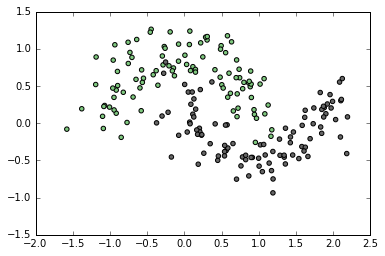

In [31]:
np.random.seed(123)
X, y = sklearn.datasets.make_moons(200,noise = 0.20)#One of many functions to generate data set .Gives a dataset X with two variables and target y
plt.scatter(X[:,0],X[:,1], c = y, cmap = plt.cm.Accent, s= 20)# plotting the two variables and coloring by target or label

Logistic Regression


In [33]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X,y)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [56]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])#ravel return a one dimesional array and np.c_ is a class to contactenate along second axis
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    


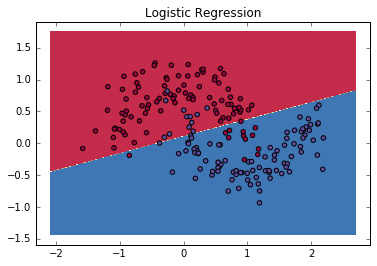

In [57]:

# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [88]:
print(xx.ravel())
print(yy.ravel())
print(np.c_[xx.ravel(),yy.ravel()])
Z = np.c_[xx.ravel(),yy.ravel()]
Z = Z.reshape(xx.shape)
print(Z)



[-2.08000984 -2.07000984 -2.06000984 ...,  2.66999016  2.67999016
  2.68999016]
[-1.43629926 -1.43629926 -1.43629926 ...,  1.75370074  1.75370074
  1.75370074]
[[-2.08000984 -1.43629926]
 [-2.07000984 -1.43629926]
 [-2.06000984 -1.43629926]
 ..., 
 [ 2.66999016  1.75370074]
 [ 2.67999016  1.75370074]
 [ 2.68999016  1.75370074]]


In [95]:

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print "Loss after iteration %i: %f" %(i, calculate_loss(model))
    
    return model

In [92]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
xx , yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z = clf.predict()

TypeError: predict() missing 1 required positional argument: 'X'

In [119]:
np.random.seed(0)
2*np.random.random((3,1))-1

array([[ 0.09762701],
       [ 0.43037873],
       [ 0.20552675]])

In [133]:
# Difference between the sigmoid and the tanh function

# Sigmoid function:
def nonlin(x,deriv= False):
    if(deriv == True):
        return x*(1-x)
    else:
        return 1/ (1+np.exp(-x))
    
for i in range(-10,10):
    print(i, nonlin(i)) # no negatives
    
for i in range(-10,10):
    print(i, np.tanh(i)) # has negatives

-10 4.53978687024e-05
-9 0.000123394575986
-8 0.000335350130466
-7 0.000911051194401
-6 0.00247262315663
-5 0.00669285092428
-4 0.0179862099621
-3 0.0474258731776
-2 0.119202922022
-1 0.26894142137
0 0.5
1 0.73105857863
2 0.880797077978
3 0.952574126822
4 0.982013790038
5 0.993307149076
6 0.997527376843
7 0.999088948806
8 0.99966464987
9 0.999876605424
-10 -0.999999995878
-9 -0.99999996954
-8 -0.99999977493
-7 -0.999998336944
-6 -0.999987711651
-5 -0.999909204263
-4 -0.999329299739
-3 -0.995054753687
-2 -0.964027580076
-1 -0.761594155956
0 0.0
1 0.761594155956
2 0.964027580076
3 0.995054753687
4 0.999329299739
5 0.999909204263
6 0.999987711651
7 0.999998336944
8 0.99999977493
9 0.99999996954


In [168]:
# Input
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0,0,1,1]]).T #4X1 after transpose
# print(X,y)

epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

np.random.seed(0)

weights_1 = np.random.random((3,1)) # Input is 4X3 and it will be multiplied by this to give the target which is 4X1
for i in range(10000):
    layer_0 = X
    layer_1 = nonlin(layer_0.dot(weights_1)) # First layer multiplying data with weights and passigng throught the tanh function   
    layer_1_error = y - layer_1 # Check the difference
    layer_1_delta = layer_1_error*nonlin(layer_1,True) # Error weighted derivative 
    weights_1 += np.dot(layer_0.T,layer_1_delta)
    
print(layer_1)

[[ 0.00966718]
 [ 0.00786453]
 [ 0.99358985]
 [ 0.99211791]]


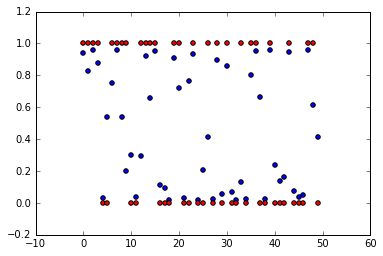

In [198]:
n = 50
X,y = sklearn.datasets.make_moons(n)
y = y.reshape((50,1))
y.shape
np.random.seed(0)

weights_1 = 2*np.random.random((2,1))-1 # Input is 4X3 and it will be multiplied by this to give the target which is 4X1
for i in range(10000):
    layer_0 = X
    layer_1 = nonlin(layer_0.dot(weights_1)) # First layer multiplying data with weights and passigng throught the tanh function   
    layer_1_error = y - layer_1 # Check the difference
    layer_1_delta = layer_1_error*nonlin(layer_1,True) # Error weighted derivative 
    weights_1 += np.dot(layer_0.T,layer_1_delta)
    
# print(layer_1)
plt.scatter(x = range(0,50), y = layer_1)
plt.scatter(x = range(0,50), y = y, c='red')

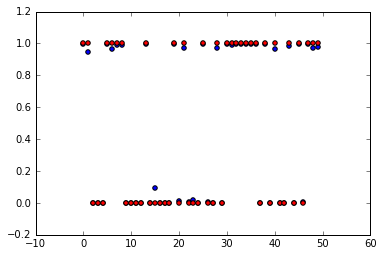

In [219]:
# Add 3 layers

X,y = sklearn.datasets.make_moons(50)
y = y.reshape((50,1))
y.shape
np.random.seed(0)

weights_1 = 2*np.random.random((2,50))-1 # Input is 4X3 and it will be multiplied by this to give the target which is 4X1
weights_2 = np.random.random((50,1)) #This will be same shape as the result
for i in range(10000):
    layer_0 = X
    layer_1 = nonlin(layer_0.dot(weights_1)) # First layer multiplying data with weights and passigng throught the tanh function same shape as target 
    layer_2 = nonlin(layer_1.dot(weights_2))
    layer_2_error = y - layer_2
    layer_2_delta = layer_2_error*nonlin(layer_2,True) # Error weighted derivative 
    layer_1_error = np.dot(layer_2_error,weights_2.T)
    layer_1_delta = layer_1_error*nonlin(layer_1,True) # Error weighted derivative 
    weights_1 += np.dot(layer_0.T,layer_1_delta)
    weights_2 += np.dot(layer_1.T,layer_2_delta)
    
# print(layer_1)
plt.scatter(x = range(0,50), y = layer_2)
plt.scatter(x = range(0,50), y = y, c='red')
# plt.subplot(1,2,2)
# plt.scatter(X[:,0],X[:,1], c = 'red')

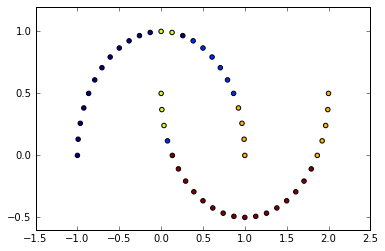

In [215]:
plt.scatter(X[:,0],X[:,1], c = layer_3)

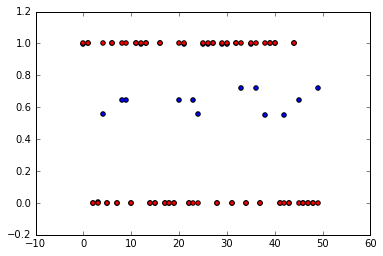

In [216]:
# Add 4 layers

X,y = sklearn.datasets.make_moons(50)
y = y.reshape((50,1))
y.shape
np.random.seed(0)

weights_1 = 2*np.random.random((2,50))-1 # Input is 4X3 and it will be multiplied by this to give the target which is 4X1
weights_2 = 2*np.random.random((50,50))-1 #This will be same shape as the result
weights_3 = 2*np.random.random((50,1))-1
for i in range(10000):
    layer_0 = X
    layer_1 = nonlin(layer_0.dot(weights_1)) # First layer multiplying data with weights and passigng throught the tanh function same shape as target 
    layer_2 = nonlin(layer_1.dot(weights_2))
    layer_3 = nonlin((layer_2).dot(weights_3))
    layer_3_error = y - layer_3
    layer_3_delta = layer_3_error*nonlin(layer_3,True) # Error weighted derivative 
    layer_2_error = np.dot(layer_3_error,weights_3.T)
    layer_2_delta = layer_2_error*nonlin(layer_2,True) # Error weighted derivative 
    layer_1_error = np.dot(layer_2_error,weights_2.T)
    layer_1_delta = layer_1_error*nonlin(layer_1,True)
    weights_1 += np.dot(layer_0.T,layer_1_delta)
    weights_2 += np.dot(layer_1.T,layer_2_delta)
    weights_3 += np.dot(layer_2.T,layer_3_delta)
    
# print(layer_1)
plt.scatter(x = range(0,50), y = layer_3)
plt.scatter(x = range(0,50), y = y, c='red')

In [202]:
weights_1.shape

(2, 1)

In [204]:
y = np.array([[0],
[1],
[1],
[0]])
y.shape

(4, 1)

In [151]:
X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
y = np.array([[0,0,1,1]]).T
np.random.seed(1)
syn0 =  np.random.random((3,1))
# print(np.dot(X,syn0))
l0 = X
l1 = nonlin(np.dot(l0,syn0))
lerror = y-l1
ldelta = lerror*nonlin(l1,True)
syn0 += np.dot(l0.T,ldelta)
print(l1)
print(lerror)
print(ldelta)

[[ 0.50002859]
 [ 0.67270365]
 [ 0.60279781]
 [ 0.75721315]]
[[-0.50002859]
 [-0.67270365]
 [ 0.39720219]
 [ 0.24278685]]
[[-0.12500715]
 [-0.14811148]
 [ 0.09510316]
 [ 0.04463427]]


In [85]:
ab1.ravel()

array([0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4, 6, 8, 0, 2, 4,
       6, 8])

In [55]:
x = lambda x: x+8
print(x(5))

13
